In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [80]:
sphere_pos = (-1.9, 0, 1.35)
sphere_size =  0.595
filename = "3Dbulk-inclusion2"
filename_back = "3Dbulk-fondo"

In [81]:
grid_size = 5
thickness = 5
size_lat = 4*thickness*grid_size
size_depth = thickness*grid_size
bulk3d = np.full((size_lat,size_lat,size_depth),1,dtype=int) 
bulk3d.shape

(100, 100, 25)

In [82]:
bulk_flat_back = bulk3d.reshape(1,size_lat*size_lat*size_depth)
bulk_flat_back.shape
with open(filename_back,"w") as f:
                savetxt(f, bulk_flat_back, fmt='%i', delimiter=" ")

In [83]:
voxel_inside = 0
for x in range(size_lat):
    for y in range(size_lat):
        for z in range(size_depth):
            pos_x = float(x) / grid_size - 2*thickness +1
            pos_y = float(y) / grid_size - 2*thickness +1
            pos_z = float(z) / grid_size
            if (((pos_x - sphere_pos[0])**2  + (pos_y - sphere_pos[1])**2 + (pos_z - sphere_pos[2])**2) < sphere_size**2):
                bulk3d[x,y,z] = 2
                voxel_inside += 1
print(voxel_inside, bulk3d.size)


(112, 250000)


In [84]:
bulk_flat = bulk3d.T.reshape(1,size_lat*size_lat*size_depth)
bulk_flat.shape

(1, 250000)

In [85]:
with open(filename,"w") as f:
                savetxt(f, bulk_flat, fmt='%i', delimiter=" ")

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


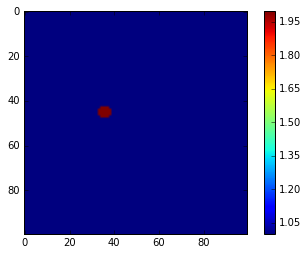

In [86]:
from matplotlib import pyplot as plt
slice_z = sphere_pos[2] * grid_size
plt.imshow(bulk3d[:,:,slice_z+1].T,vmin=1,vmax=2)
cbar = plt.colorbar()